In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math 

In [2]:
from scipy.stats import skew, kurtosis


In [3]:
df=pd.read_csv("house_price (1).csv")

df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
df2 = df.dropna()
print(df2)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [5]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [8]:
Mean=df2["price_per_sqft"].mean().round(2)
Mean

7920.34

In [9]:
df2["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

In [11]:
df2.price_per_sqft.quantile([0.50,0.25,0.75])

0.50    5438.0
0.25    4267.0
0.75    7317.0
Name: price_per_sqft, dtype: float64

In [19]:
df2.price_per_sqft.quantile([0.80,0.82,0.89,0.90,0.95,0.97,0.98,0.99])

0.80     8019.20
0.82     8428.00
0.89    11017.88
0.90    11666.00
0.95    15312.10
0.97    17857.00
0.98    20000.00
0.99    23674.45
Name: price_per_sqft, dtype: float64

In [29]:
q1=df2.price_per_sqft.quantile(0.25)
q1

4267.0

In [28]:
q3=df2.price_per_sqft.quantile(0.75)
q3

7317.0

In [23]:
df2.price_per_sqft.quantile(0.50)

5438.0

In [30]:
IQR=q3-q1 
IQR


3050.0

In [31]:
lower=q1-1.5*IQR
upper=q3+1.5*IQR

lower,upper

(-308.0, 11892.0)

In [33]:
df2[(df2.price_per_sqft<lower) | (df2.price_per_sqft>upper)]  #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [40]:
df_without_outlier=df2[((df2.price_per_sqft>lower)) & ((df2.price_per_sqft<upper))]   #without outliers
df_without_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


From the data we can know that there is  1265 rows of outliers 

In [41]:
#normal distribution
df2["price_per_sqft"].describe().round(2)

count       13200.00
mean         7920.34
std        106727.16
min           267.00
25%          4267.00
50%          5438.00
75%          7317.00
max      12000000.00
Name: price_per_sqft, dtype: float64

In [ ]:
#Here mean(7920.34) is greater than median(50%-5438.00).So it is positively skewed.

C:\Users\User\AppData\Local\Temp\ipykernel_9260\913516614.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["price_per_sqft"],color='r')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

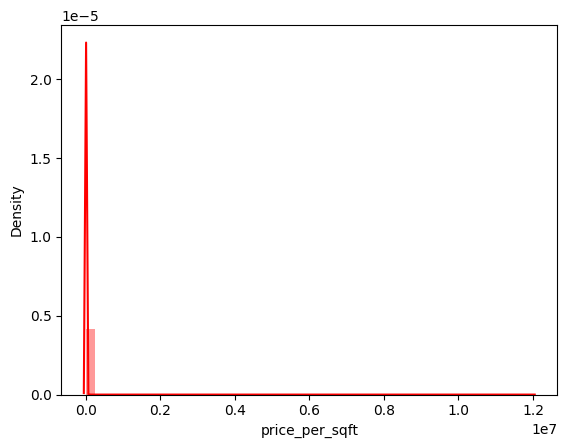

In [42]:
sns.distplot(df2["price_per_sqft"],color='r')

In [43]:
df2['price_per_sqft'].skew()

108.28105529705168

In [44]:
kurtosis(df2['price_per_sqft'],fisher=False)  

12093.633538860382

In [46]:
df2['log_price_per_sqft']=np.log(df2["price_per_sqft"])
df2['log_price_per_sqft']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: log_price_per_sqft, Length: 13200, dtype: float64

C:\Users\User\AppData\Local\Temp\ipykernel_9260\3352160934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["log_price_per_sqft"],color='r')


<Axes: xlabel='log_price_per_sqft', ylabel='Density'>

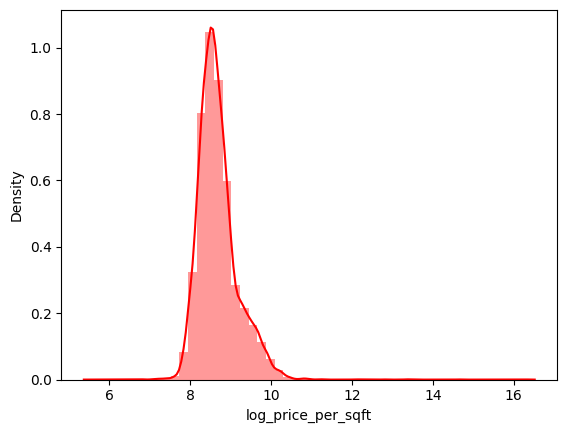

In [47]:
sns.distplot(df2["log_price_per_sqft"],color='r')

In [48]:
df2['log_price_per_sqft'].skew()

1.3998626551353

In [49]:
df2['log_price_per_sqft'].skew()

1.3998626551353

In [50]:
kurtosis(df2['log_price_per_sqft'],fisher=False)


12.199636085376468

<Axes: xlabel='price_per_sqft', ylabel='Count'>

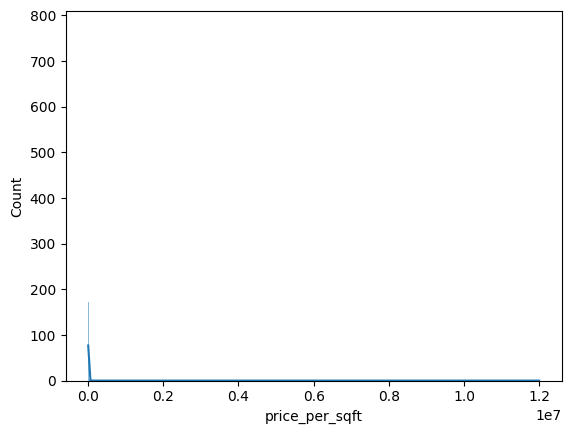

In [52]:
sns.histplot(data=df2, x=df2.price_per_sqft,kde=True)

In [54]:
m=df2.price_per_sqft.mean()
m

7920.336742424242

In [55]:
s=df2.price_per_sqft.std()
s

106727.16032810867

In [57]:
ns=m-3*s  #-3sigma
ns

-312261.14424190175

In [58]:
ps=m+3*s  # +3sigma
ps

328101.8177267502

In [59]:
df2[(df2.price_per_sqft>-312261)& (df2.price_per_sqft<328101)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,9.250234


In [60]:
df2["zscore"]=(df2.price_per_sqft-m)/s  #z=  x-mean/std
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674,-0.034390
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,9.250234,0.023299


In [61]:
df3=df2[(df2.zscore>-3) & (df2.zscore<3)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674,-0.034390
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,9.250234,0.023299


In [62]:
df3=df2[(df2.zscore>-3) & (df2.zscore<3)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674,-0.034390
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,9.250234,0.023299


In [64]:
df1=df3.drop(["zscore","size","location"],axis=1)
df1

,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,1056.0,2.0,39.07,2,3699,8.215818
1,2600.0,5.0,120.00,4,4615,8.437067
2,1440.0,2.0,62.00,3,4305,8.367532
3,1521.0,3.0,95.00,3,6245,8.739536
4,1200.0,2.0,51.00,2,4250,8.354674
...,...,...,...,...,...,...
13195,3453.0,4.0,231.00,5,6689,8.808220
13196,3600.0,5.0,400.00,4,11111,9.315691
13197,1141.0,2.0,60.00,2,5258,8.567506
13198,4689.0,4.0,488.00,4,10407,9.250234


In [65]:
corr1=df1.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
total_sqft,1.000000,0.393507,0.574582,0.346970,0.129342,0.114451
bath,0.393507,1.000000,0.456180,0.898030,0.376479,0.439071
price,0.574582,0.456180,1.000000,0.397033,0.607378,0.599860
bhk,0.346970,0.898030,0.397033,1.000000,0.366117,0.415969
price_per_sqft,0.129342,0.376479,0.607378,0.366117,1.000000,0.852666
log_price_per_sqft,0.114451,0.439071,0.599860,0.415969,0.852666,1.000000


<Axes: >

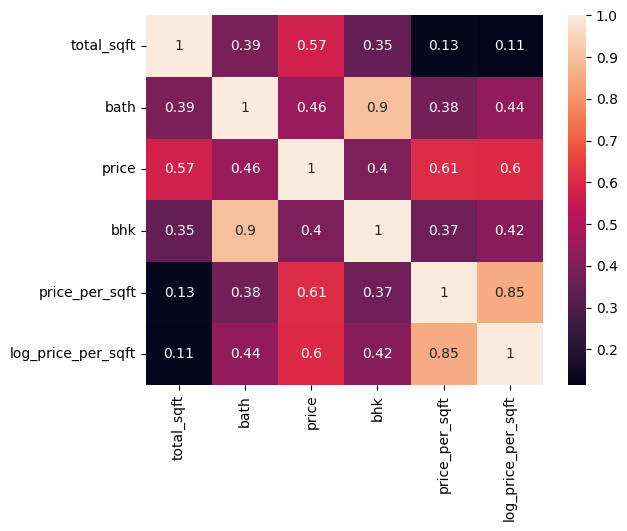

In [66]:
sns.heatmap(corr1,annot=True)

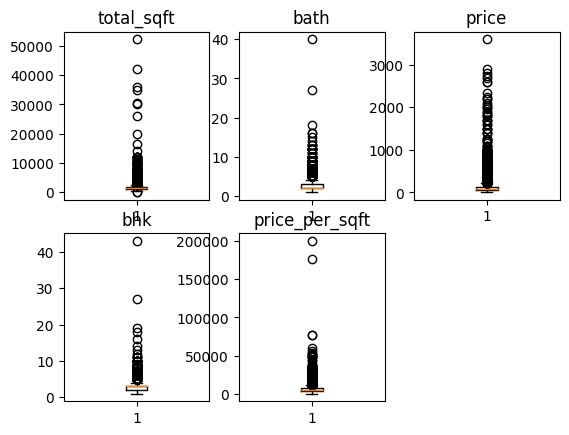

In [67]:
plt.subplot(2, 3, 1)
plt.boxplot(df1.total_sqft)
plt.title("total_sqft")

plt.subplot(2, 3, 2)
plt.boxplot(df1.bath)
plt.title("bath")

plt.subplot(2, 3, 3)
plt.boxplot(df1.price)
plt.title("price")

plt.subplot(2, 3, 4)
plt.boxplot(df1.bhk)
plt.title("bhk")

plt.subplot(2, 3, 5)
plt.boxplot(df1.price_per_sqft)
plt.title("price_per_sqft")


plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


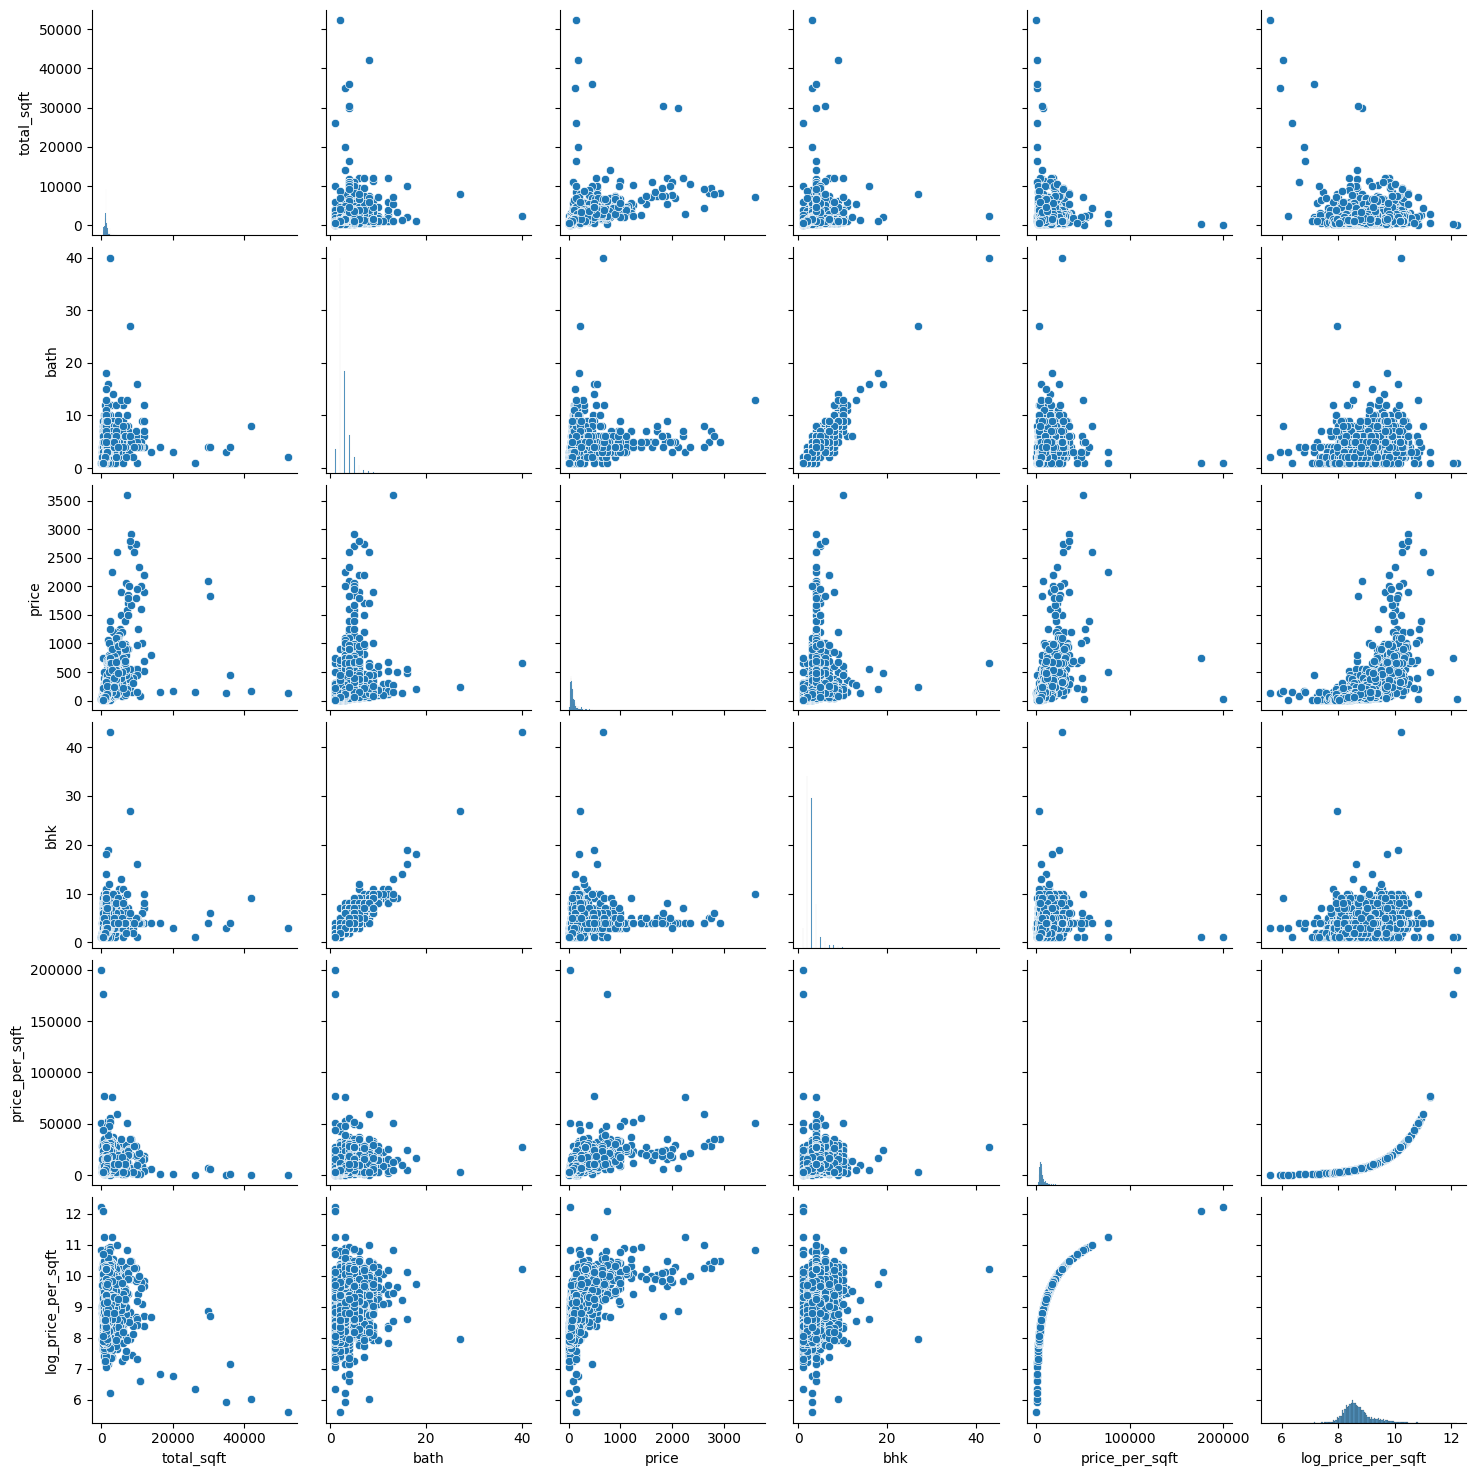

In [68]:
sns.pairplot(df1)
plt.show()